In [258]:
import pandas as pd
import numpy as np

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import data

In [260]:
frame1 = pd.read_csv('Total_jobs.csv')

In [261]:
frame2 = pd.read_csv('Avg_Income.csv')

In [262]:
frame3 = (pd.concat([frame1, frame2]))

#### Fill all NaN value with 0 before log transformation (My logic)

In [263]:
frame4 = frame3.fillna(value=0)

#### Perform log transformation using pandas' .apply() method and numpy.log()

In [264]:
small_constant = 0.5

In [265]:
frame4['Log_Job'] = np.log(frame4['Job created'] + small_constant)

In [266]:
frame4['Log_saving'] = np.log(frame4['Total Savings'] + small_constant)

In [267]:
frame4.head()

,NTA,Job created,Total Savings,Log_Job,Log_saving
0,Battery Park City-Lower Manhattan,0.0,0.0,-0.693147,-0.693147
1,Bushwick South,10.0,0.0,2.351375,-0.693147
2,Carroll Gardens-Columbia Street-Red Hook,0.0,0.0,-0.693147,-0.693147
3,College Point,2.0,0.0,0.916291,-0.693147
4,Crown Heights North,0.0,0.0,-0.693147,-0.693147


#### scatter plot of job created versus average total savings

In [268]:
x1 = frame4['Job created']
y1 = frame4['Total Savings']

Text(0, 0.5, 'Average Total Saving')

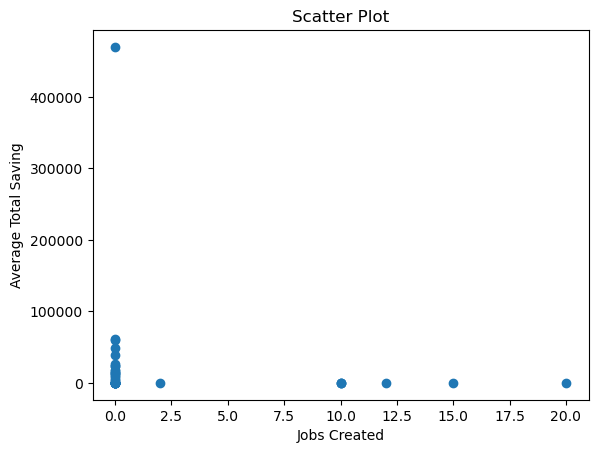

In [269]:
plt.scatter(x1, y1)
plt.title('Scatter Plot')
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Saving')

In [270]:
x2 = frame4['Log_Job']
y2 = frame4['Log_saving']

Text(0, 0.5, 'Average Total Saving')

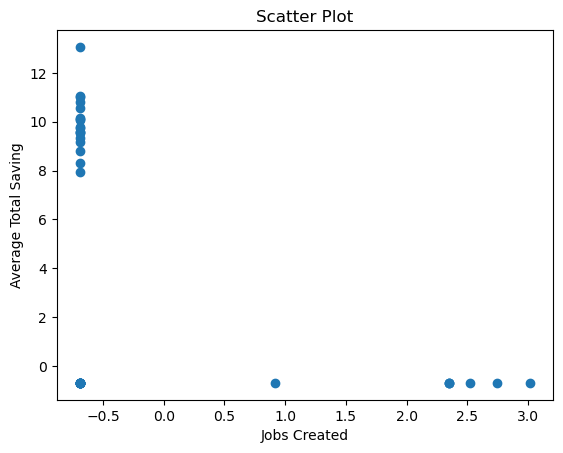

In [271]:
plt.scatter(x2, y2)
plt.title('Scatter Plot')
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Saving')

#### Histogram of the log of the average total savings.

(array([18.,  0.,  0.,  0.,  0.,  0.,  3., 10.,  4.,  1.]),
 array([-0.69314718,  0.6821932 ,  2.05753359,  3.43287397,  4.80821436,
         6.18355474,  7.55889513,  8.93423551, 10.30957589, 11.68491628,
        13.06025666]),
 <BarContainer object of 10 artists>)

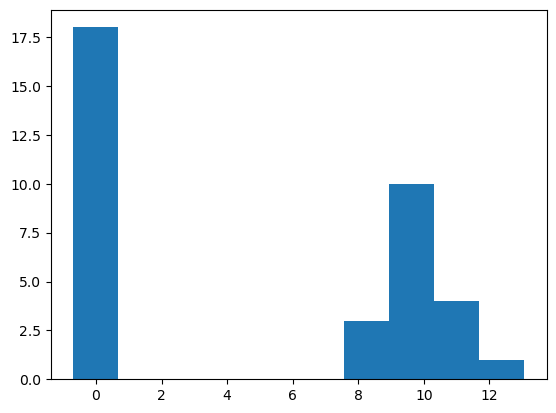

In [272]:
plt.hist(y2)

#### Line plot of the total jobs created for each month.

In [273]:
Data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [274]:
Data['Effective Date'] = pd.to_datetime(Data['Effective Date'])

In [275]:
Data.loc[0, 'Effective Date'].month_name()

'March'

In [276]:
Month = Data['Effective Date'].dt.month_name()

In [277]:
Month

0         March
1         April
2       January
3      February
4          June
         ...   
445    December
446    December
447      August
448     January
449     October
Name: Effective Date, Length: 450, dtype: object

In [278]:
Jobs = Data [['Job created']]

In [279]:
Jobs1 = (pd.concat([Month, Jobs]))

In [280]:
Jobs1

,0,Job created
0,March,NaN
1,April,NaN
2,January,NaN
3,February,NaN
4,June,NaN
...,...,...
445,NaN,10.0
446,NaN,NaN
447,NaN,NaN
448,NaN,NaN


In [281]:
Jobs1['Job created'] = Jobs1['Job created'].fillna(0)

In [282]:
Jobs1

,0,Job created
0,March,0.0
1,April,0.0
2,January,0.0
3,February,0.0
4,June,0.0
...,...,...
445,NaN,10.0
446,NaN,0.0
447,NaN,0.0
448,NaN,0.0


In [283]:
Jobs1 = Jobs1.rename(columns={0: 'Months'})

In [284]:
Jobs1

,Months,Job created
0,March,0.0
1,April,0.0
2,January,0.0
3,February,0.0
4,June,0.0
...,...,...
445,NaN,10.0
446,NaN,0.0
447,NaN,0.0
448,NaN,0.0


In [285]:
Jobs1.dropna(axis=0)

,Months,Job created
0,March,0.0
1,April,0.0
2,January,0.0
3,February,0.0
4,June,0.0
...,...,...
445,December,0.0
446,December,0.0
447,August,0.0
448,January,0.0


In [286]:
Jobs_per_month = Jobs1.groupby('Months')[['Job created']].sum()

In [253]:
Jobs_per_month

,Job created
Months,
April,0.0
August,0.0
December,0.0
February,0.0
January,0.0
July,0.0
June,0.0
March,0.0
May,0.0


<Axes: xlabel='Months', ylabel='Job created'>

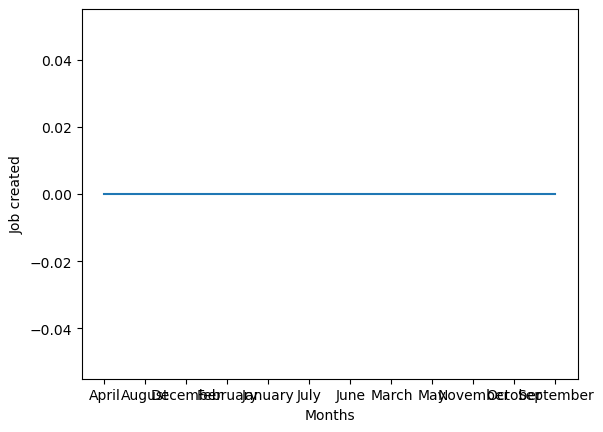

In [288]:
sns.lineplot(x='Months', y= 'Job created', data=Jobs_per_month)